In [3]:
import h5py
import torch
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import sys


In [4]:

sys.path.append('/home/da886/yolov5/')  # Replace with the actual path to the yolov5 directory

# Set device IDs for multi-GPU usage
device_ids = [0, 1, 2]
import torch
import torchvision.transforms as transforms


In [5]:
from models.yolo import Model


In [6]:

# Define the model configuration (you can choose yolov5s, yolov5m, etc.)
model = Model('/home/da886/yolov5/models/yolov5s.yaml')



                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 


  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1   1182720  models.common.C3                        [512, 512, 1]                 
  9                -1  1    656896  models.common.SPPF                      [512, 512, 5]                 
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    361984  models.common.C3                        [512, 256, 1, False]          
 14                -1  1     33024  m

In [7]:
import torch

# Load the YOLOv5s model with pretrained weights directly
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=False)
model.model[0] = torch.nn.Conv2d(1, 32, kernel_size=6, stride=2, padding=2)
# Move the model to GPU
model = model.cuda()

# Put the model into evaluation mode (if using it for inference)
model.eval()


Using cache found in /home/da886/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-22 Python-3.9.18 torch-2.5.0+cu124 CUDA:0 (NVIDIA A100 80GB PCIe, 81156MiB)


                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Conv                      [3, 32, 6, 2, 2]              
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  2    115712  models.common.C3                        [128, 128, 2]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  3    625152  models.common.C3                        [256

DetectionModel(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv3): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, tr

In [ ]:

# # Create the model (replace `YourModel` with your actual model class)
# model = YourModel()

# # Move model to GPUs using DataParallel
# if torch.cuda.device_count() > 1:
#     print(f"Let's use {len(device_ids)} GPUs!")
#     model = nn.DataParallel(model, device_ids=device_ids)



In [8]:

class HDF5YOLODataset(Dataset):
    def __init__(self, h5_file_path):
        self.h5_file = h5py.File(h5_file_path, 'r')
        self.images = self.h5_file['images']
        self.labels = self.h5_file['centers_training']

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Load image
        image = self.images[idx]
        # image = np.expand_dims(image, axis=0)
        
        # Convert image to proper format (if needed)
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Adding channel dimension

        # Load YOLO formatted labels
        label = self.labels[idx]
        return image, label


In [9]:

# Example usage
dataset = HDF5YOLODataset('/home/da886/Final Electron counting project/Images and Labels/12KFixed_Mixed_13_32by32_SparsespotsRandomIndex.h5')


In [10]:
dataset.labels.shape

(12000, 13, 3)

In [11]:
dataset.labels[1]

array([[          1,          16,           1],
       [          1,          16,          24],
       [          1,          15,          27],
       [          1,          19,           9],
       [          1,           8,          20],
       [          1,           2,          17],
       [          1,          31,           8],
       [          1,          26,           4],
       [          1,           3,           6],
       [          1,          19,          19],
       [          1,          30,          10],
       [          1,          23,           9],
       [          1,           6,          11]], dtype=float32)

In [12]:
plt.imshow(dataset.images[1])

In [13]:
dataset.images.shape

(12000, 32, 32)

In [14]:
from torch.utils.data import DataLoader

# Initialize the dataset and DataLoader
train_dataset = HDF5YOLODataset('/home/da886/Final Electron counting project/Images and Labels/12KFixed_Mixed_13_32by32_SparsespotsRandomIndex.h5')
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=13)


In [15]:
# Define the optimizer (Adam or SGD)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Optionally, define a learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)


torch.Size([16, 1, 32, 32]) torch.Size([16, 13, 3])


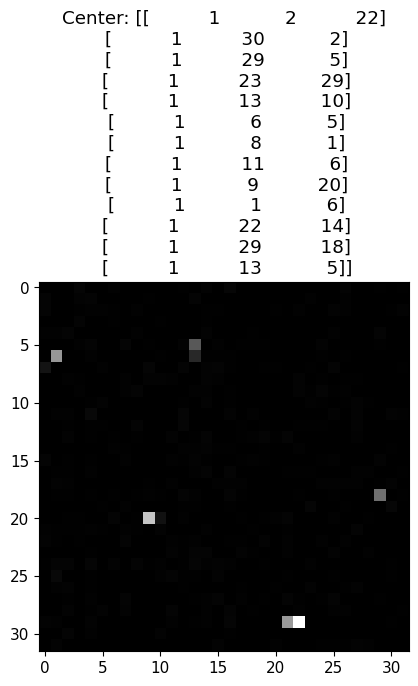

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
batch = next(iter(train_loader))
images, labels = batch
print(images.shape, labels.shape)
plt.imshow(images[0].squeeze().numpy(), cmap='gray')
plt.title('Center: {}'.format(labels[0].numpy()))
plt.show()

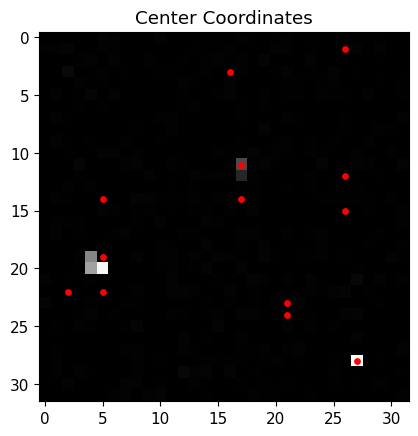

In [28]:
import matplotlib.pyplot as plt

# Get a batch from the DataLoader
batch = next(iter(train_loader))
images, labels = batch

# Display the first image in the batch
plt.imshow(images[0].squeeze().numpy(), cmap='gray')

# Extract the label information (assuming labels are in the format [class_id, x_center, y_center])
centers = labels[0].numpy()[:, 1:]  # Extract only the x_center, y_center (ignore class_id)

# Plot the center points on the image
for center in centers:
    x, y = center
    plt.scatter(x, y, color='red', s=15)  # Plot the center with red color

plt.title('Center Coordinates')
plt.show()


In [ ]:
outputs = model(images)
print(outputs.shape, labels.shape)

In [23]:
num_epochs = 10  # Number of epochs to train

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        # Move data to GPU
        images, labels = images.cuda(), labels.cuda()

        # Zero the gradient buffers
        optimizer.zero_grad()

        # Forward pass
        pred = model(images)

        # Compute loss (the YOLO model has a built-in loss function)
        loss = model.compute_loss(pred, labels)[0]  # Extract the total loss

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Print statistics every 100 batches
        if i % 100 == 99:
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss / 100:.4f}")
            running_loss = 0.0

    # Step the learning rate scheduler
    scheduler.step()

# Save the trained model
# torch.save(model.state_dict(), 'yolov5_custom_trained.pth')


RuntimeError: Given groups=1, weight of size [32, 3, 6, 6], expected input[16, 1, 32, 32] to have 3 channels, but got 1 channels instead